In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import regularizers

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


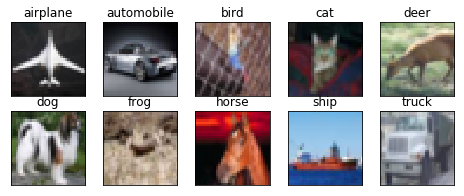

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 15s 40ms/step - loss: 1.8467 - acc: 0.2968 - val_loss: 1.4492 - val_acc: 0.4709
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3435 - acc: 0.5117 - val_loss: 1.1033 - val_acc: 0.5985
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1354 - acc: 0.5987 - val_loss: 0.9864 - val_acc: 0.6492
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 1.0010 - acc: 0.6470 - val_loss: 0.9347 - val_acc: 0.6787
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9111 - acc: 0.6816 - val_loss: 0.8393 - val_acc: 0.7049
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8374 - acc: 0.7113 - val_loss: 0.8500 - val_acc: 0.7111
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7707 - acc: 0.7346 - val_loss: 0.6974 - val_acc: 0.7591
Epoch 8/100
390/390 [==============================] - 9s 23m

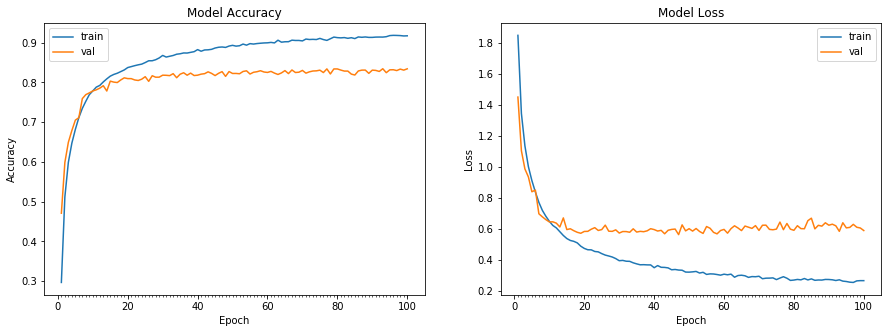

Accuracy on test data is: 83.40


In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Assignment-6A**

In [0]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [101]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same',  kernel_regularizer=regularizers.l2(0.001),input_shape=(32, 32, 3))) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## 
model.add(MaxPooling2D(pool_size=(2, 2))) ## 
model.add(Dropout(0.025))
model.add(Convolution2D(48, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## 
model.add(MaxPooling2D(pool_size=(2, 2))) ## 
model.add(Dropout(0.025))
model.add(Convolution2D(48, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ##
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## 
model.add(MaxPooling2D(pool_size=(2, 2))) ## 
model.add(Dropout(0.025))
model.add(Convolution2D(48, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## rf 
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 
model.add(Dropout(0.025))
model.add(Convolution2D(40, 1 , kernel_regularizer=regularizers.l2(0.001), border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Convolution2D(10, 1 , kernel_regularizer=regularizers.l2(0.001), border_mode='same'))
##model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (1, 1), kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 

In [102]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_600 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_469 (Bat (None, 32, 32, 48)        192       
_________________________________________________________________
activation_497 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_601 (Conv2D)          (None, 32, 32, 96)        41568     
_________________________________________________________________
batch_normalization_470 (Bat (None, 32, 32, 96)        384       
_________________________________________________________________
activation_498 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_602 (Conv2D)          (None, 32, 32, 192)       166080    
__________

In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             horizontal_flip=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=99)`
  """


Epoch 1/99


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


97/97 [==============================] - 68s 699ms/step - loss: 3.3933 - acc: 0.4412 - val_loss: 3.5549 - val_acc: 0.3595
Epoch 2/99
97/97 [==============================] - 42s 429ms/step - loss: 2.6906 - acc: 0.6368 - val_loss: 3.6315 - val_acc: 0.2693
Epoch 3/99
97/97 [==============================] - 38s 394ms/step - loss: 2.1917 - acc: 0.7338 - val_loss: 2.7831 - val_acc: 0.4850
Epoch 4/99
97/97 [==============================] - 38s 394ms/step - loss: 1.8397 - acc: 0.7866 - val_loss: 2.9251 - val_acc: 0.3547
Epoch 5/99
97/97 [==============================] - 38s 392ms/step - loss: 1.5607 - acc: 0.8223 - val_loss: 2.0253 - val_acc: 0.6522
Epoch 6/99
97/97 [==============================] - 38s 394ms/step - loss: 1.3673 - acc: 0.8394 - val_loss: 1.9999 - val_acc: 0.6131
Epoch 7/99
97/97 [==============================] - 38s 394ms/step - loss: 1.2086 - acc: 0.8580 - val_loss: 1.6924 - val_acc: 0.6752
Epoch 8/99
97/97 [==============================] - 38s 393ms/step - loss: 1.083

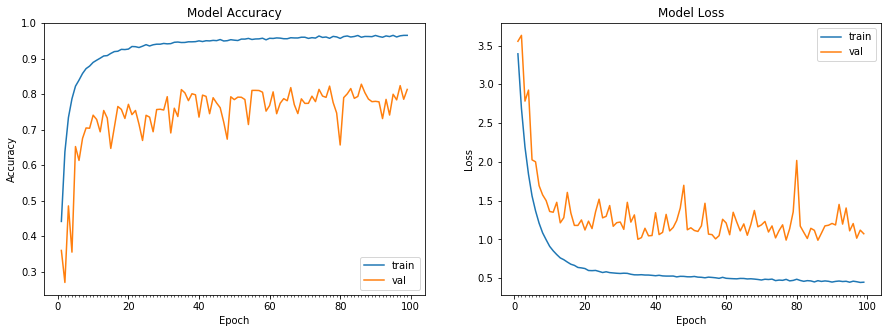

Accuracy on test data is: 81.32


In [104]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 99, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))